116
/home/adriano/projeto_mestrado/modules/Vessel_Models_pickle/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@74-Image 4-20X_savedata0.pickle
{'img_file': '/home/adriano/projeto_mestrado/modules/Imagens/vessel_data/images/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@74-Image 4-20X.tiff', 'vessel_model': <Slice_mapper.slice_mapper.VesselModel object at 0x7f1ab2366940>, 'primeiro_ponto': array([ 66, 595])}
16
/home/adriano/projeto_mestrado/modules/Vessel_Models_pickle/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@41-Image 1-20X_savedata7.pickle
{'img_file': '/home/adriano/projeto_mestrado/modules/Imagens/vessel_data/images/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@41-Image 1-20X.tiff', 'vessel_model': <Slice_mapper.slice_mapper.VesselModel object at 0x7f1ab33ff5e0>, 'primeiro_ponto': array([250, 573])}
38
/home/adriano/projeto_mestrado/modules/Vessel_Models_pickle/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers

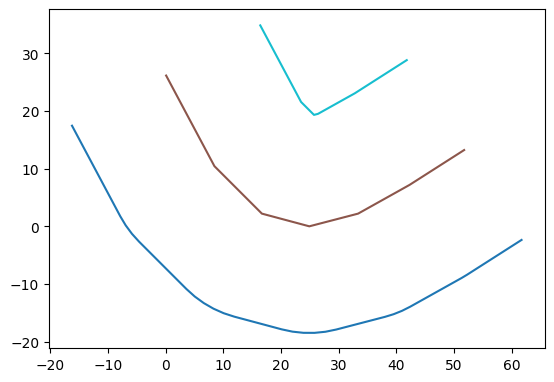

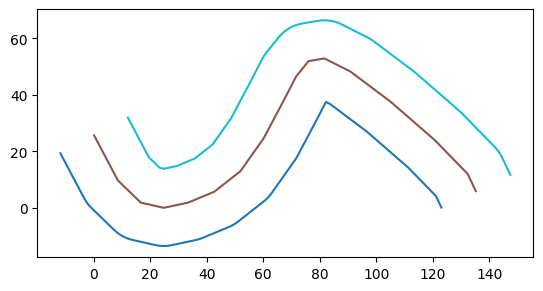

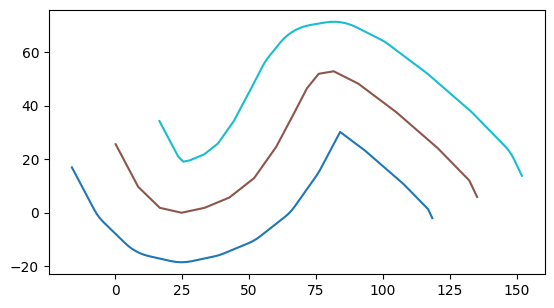

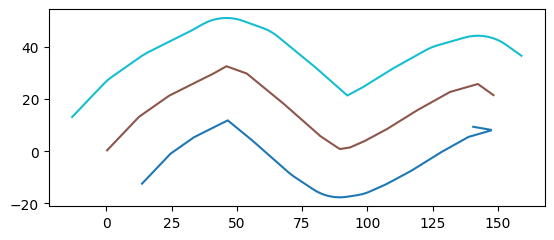

In [45]:
import pickle
import numpy as np
from PIL import Image
import sys
import geopandas as gpd

sys.path.insert(0, "/home/adriano/projeto_mestrado/modules")

from Funcoes_gerais import funcoes

import background_generation as backgen

root_dir = f"/home/adriano/projeto_mestrado/modules"

img_dir = f'{root_dir}/Imagens/vessel_data/images/'
lab_dir = f'{root_dir}/Imagens/vessel_data/labels_20x/'
pickle_dir = f'{root_dir}/Vessel_Models_pickle'

img_especifica = 'Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 3-20X'
array_pickles = funcoes.ler_diretorios(pickle_dir)
vetor_informacoes = []

tracados = f'{root_dir}/Artificial_Lines/array_arquivos.json'
array_medial_path = backgen.retorna_paths(tracados)

for i in range(len(array_medial_path)):  
  n_random = np.random.randint(0, len(array_pickles), size=1)
  print(n_random[0])
  path = (pickle_dir + f'/{array_pickles[n_random[0]]}')
  print(path)
  arquivo_pickle = pickle.load(open(path, 'rb'))
  print(arquivo_pickle)
  vessel_map = arquivo_pickle['vessel_model'].vessel_map 
  mapa_original = vessel_map.mapped_values,
  imagem_binaria_original = vessel_map.mapped_mask_values
  imagem_binaria_sem_artefatos_laterais = backgen.retornar_imagem_binaria_sem_artefatos(vessel_map, imagem_binaria_original)
  imagem_binaria_sem_artefatos = backgen.fill_holes(imagem_binaria_sem_artefatos_laterais)
  rows, cols = mapa_original[0].shape
  distancia = (rows/2)  
 
  dict = {
      "path": path,
      "arquivo_pickle": arquivo_pickle,
      "vessel_map": vessel_map,
      "mapa_original": mapa_original,
      "imagem_binaria_original" : imagem_binaria_original,
      "imagem_binaria_sem_artefatos_laterais" : imagem_binaria_sem_artefatos_laterais,  
      "imagem_binaria_sem_artefatos" : imagem_binaria_sem_artefatos,    
      "rows": rows,
      "cols": cols,
      "distancia": distancia
    }
  vetor_informacoes.append(dict)
array_medial_path

for i in range(len(array_medial_path)):    
    caminhos_transladados_interpolado = backgen.retorna_caminhos_transladados(array_medial_path[i], 2) # type: ignore
    maior_valor_interpolado = np.max(caminhos_transladados_interpolado[0])
    distancia = vetor_informacoes[i]['distancia'] # type: ignore
    mapa_original = vetor_informacoes[i]['mapa_original'] # type: ignore
    imagem_binaria_sem_artefatos = vetor_informacoes[i]['imagem_binaria_sem_artefatos'] # type: ignore

   
    mapa_expandido_original = backgen.expandir_mapas_do_tamanho_do_tracado(mapa_original[0],maior_valor_interpolado)
    mapa_expandido_bin = backgen.expandir_mapas_do_tamanho_do_tracado(imagem_binaria_sem_artefatos,maior_valor_interpolado)
    #mask_mapa_expandido_bin = np.ones(mapa_expandido_bin.shape)

    print(distancia)
    if distancia < 30:    
      linha_central,linha_offset_esquerda,linha_offset_direita, maior_tamanho = backgen.retorna_linhas_offset_posicao_tamanho(caminhos_transladados_interpolado[0],distancia)

      gp4 = gpd.GeoSeries([linha_offset_esquerda, linha_central, linha_offset_direita])
      gp4.plot(cmap="tab10")





{'img_file': '/home/adriano/projeto_mestrado/modules/Imagens/vessel_data/images/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@40-Image 3-20X.tiff', 'vessel_model': <Slice_mapper.slice_mapper.VesselModel object at 0x7f1ab273ec40>, 'primeiro_ponto': array([234, 462])}
{'img_file': '/home/adriano/projeto_mestrado/modules/Imagens/vessel_data/images/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@65-Image 1-20X.tiff', 'vessel_model': <Slice_mapper.slice_mapper.VesselModel object at 0x7f1ab2366580>, 'primeiro_ponto': array([285, 662])}
{'img_file': '/home/adriano/projeto_mestrado/modules/Imagens/vessel_data/images/Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@41-Image 4-20X.tiff', 'vessel_model': <Slice_mapper.slice_mapper.VesselModel object at 0x7f1ab3307820>, 'primeiro_ponto': array([722, 544])}
Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@65-Image 2-20X_savedata0.pickle
Experiment #1 (adults set #1)_20x_batch1 - Superfical layers@